# Installing Libraries

In [135]:
#pip install yfinance

# Importing Libraries

In [136]:
#==========================

#
##
### Importing Libraries ###
#
##
#==========================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Creating functions

In [137]:
#=========================
#
##
### Creating functions ###
#
##
#=========================

# EMA CALCULATION
def ema_and_distances(data):
    data['EMA_20'] = data['close'].ewm(span=20, adjust=False).mean()
    data['EMA_20_distance'] = (1 - (data['EMA_20'] / data['close'])) * 100 # Distance between EMA_20 and Close'. Meu preço 
    
    return data['EMA_21_distance']

# Z-SCORE EMA CALCULATION
def ema_zscore_distances(data):
    #data = dataframe
    #x = columns of daily returns from the dataframe
    mu = np.mean(data['EMA_20_distance'])
    sigma = np.std(data['EMA_20_distance'])
    z_score = (data['EMA_20_distance'] - mu) / sigma
    data['EMA20_zscore_distance'] = z_score
    
    return data['EMA20_zscore_distance']

# Reading data from yfinance

In [138]:
#==================================
#
##
### Loading Data using yfinance ###
##
#
#==================================


# List of ticker symbols for your assets
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA', 'ABEV3.SA', 'WEGE3.SA', 'BBAS3.SA', 'RENT3.SA', 'SUZB3.SA']

# Fetch historical data (adjusting for stock splits/dividends)
data = yf.download(tickers, period='2y', auto_adjust=False)  # You can modify the period as needed

# Extract the closing prices
closing_prices = data['Adj Close']

print(closing_prices.info(), '\n\n\n', closing_prices)

[*********************100%***********************]  10 of 10 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-09-26 00:00:00+00:00 to 2024-09-26 00:00:00+00:00
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  502 non-null    float64
 1   B3SA3.SA  502 non-null    float64
 2   BBAS3.SA  502 non-null    float64
 3   BBDC4.SA  502 non-null    float64
 4   ITUB4.SA  502 non-null    float64
 5   PETR4.SA  502 non-null    float64
 6   RENT3.SA  502 non-null    float64
 7   SUZB3.SA  502 non-null    float64
 8   VALE3.SA  502 non-null    float64
 9   WEGE3.SA  502 non-null    float64
dtypes: float64(10)
memory usage: 43.1 KB
None 


 Ticker                      ABEV3.SA   B3SA3.SA   BBAS3.SA   BBDC4.SA  \
Date                                                                    
2022-09-26 00:00:00+00:00  13.785151  11.946056  16.830887  17.122433   
2022-09-27 00:00:00+00:00  13.938619  11.834670  16.619581  17.018347   
2022-09-28 00:00:00+00:00  14.19139

In [139]:
closing_prices

Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,ITUB4.SA,PETR4.SA,RENT3.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-09-26 00:00:00+00:00,13.785151,11.946056,16.830887,17.122433,24.384434,18.626064,58.314091,40.041828,59.482273,29.589149
2022-09-27 00:00:00+00:00,13.938619,11.834670,16.619581,17.018347,24.243530,18.867712,57.119431,40.862286,58.599392,29.085835
2022-09-28 00:00:00+00:00,14.191392,11.927492,16.623888,17.027018,24.234726,18.613346,56.550106,41.022602,59.153351,29.347166
2022-09-29 00:00:00+00:00,14.092089,11.695440,16.533337,17.157127,24.595783,18.638779,55.822582,40.767979,59.231258,29.172947
2022-09-30 00:00:00+00:00,14.028895,12.113132,16.610956,17.209171,24.710262,18.950382,57.381821,41.965649,62.355988,31.108774
...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,12.760000,11.501536,27.500000,14.750000,35.930000,36.259998,42.589790,52.340000,57.349998,52.520000
2024-09-23 00:00:00+00:00,12.750000,11.104932,27.400000,14.370000,35.720001,36.630001,42.302555,51.650002,57.529999,54.320000
2024-09-24 00:00:00+00:00,12.760000,11.154508,27.379999,14.350000,35.709999,36.779999,42.669029,53.009998,60.340000,55.389999


# Exploratory Data Analysis (EDA)

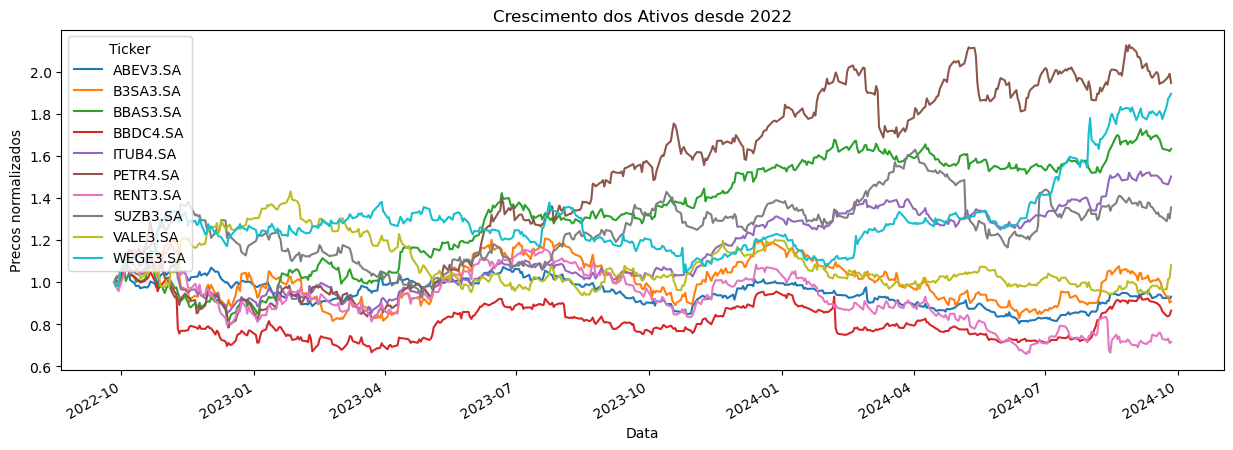

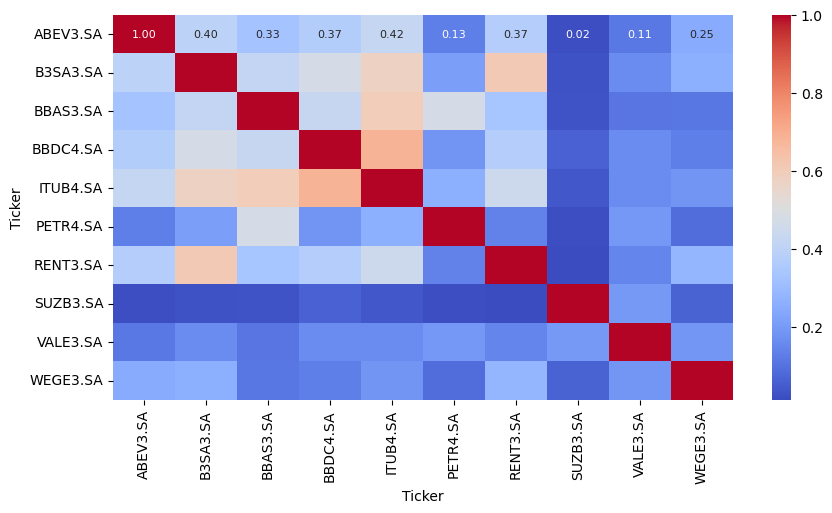

In [140]:
#======================================
#
##
### Exploratory Data Analysis (EDA) ###
##
#
#======================================

# Plotting all assets to see which of them growth more over the time (standardized calculation)
closing_price_n = closing_prices.div(closing_prices.iloc[0])

fig_dims = (15,5)
closing_price_n.plot(figsize=fig_dims)
plt.title("Crescimento dos Ativos desde 2022")
plt.xlabel("Data")
plt.ylabel("Precos normalizados")
plt.show()


# Para nos, mais importante que os precos, sao os retornos dos ativos financeiros e como iremos realizar esse calculo, 
# pois segundo Earnst Chang, o retorno sao valores que tendem a se distrubuir randomicamente ao redor de uma media zero 
pct_change = closing_prices.pct_change().dropna()

# Calculando a matrix de correlacao do retorno desses ativos
corr_matrix_returns = pct_change.corr()

# Plotando a matrix de correlacao
plt.figure(figsize=(10,5))
corr_heatmap = sns.heatmap(corr_matrix_returns, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap='coolwarm', xticklabels=pct_change.columns, yticklabels=pct_change.columns)
plt.show()

In [141]:
# Create a copy of `closing_prices` to avoid modifying the original
closing_prices_copy = closing_prices.copy()

# Replace '.SA' in the column names, not the index
closing_prices_copy.columns = closing_prices_copy.columns.str.replace('.SA', '')

for column in closing_prices_copy.columns:
    closing_prices_copy[column+"_ema_20"] = closing_prices_copy[column].ewm(span=20, adjust=False).mean()
    closing_prices_copy[column+"_ema_20_dist"] = (1 - (closing_prices_copy[column+"_ema_20"] / closing_prices_copy[column])) * 100 

# Now, `closing_prices_copy` contains the EMA columns and the distance calculation
df = closing_prices_copy
df

Ticker,ABEV3,B3SA3,BBAS3,BBDC4,ITUB4,PETR4,RENT3,SUZB3,VALE3,WEGE3,...,PETR4_ema_20,PETR4_ema_20_dist,RENT3_ema_20,RENT3_ema_20_dist,SUZB3_ema_20,SUZB3_ema_20_dist,VALE3_ema_20,VALE3_ema_20_dist,WEGE3_ema_20,WEGE3_ema_20_dist
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26 00:00:00+00:00,13.785151,11.946056,16.830887,17.122433,24.384434,18.626064,58.314091,40.041828,59.482273,29.589149,...,18.626064,0.000000,58.314091,0.000000,40.041828,0.000000,59.482273,0.000000,29.589149,0.000000
2022-09-27 00:00:00+00:00,13.938619,11.834670,16.619581,17.018347,24.243530,18.867712,57.119431,40.862286,58.599392,29.085835,...,18.649078,1.158771,58.200314,-1.892321,40.119967,1.816635,59.398189,-1.363149,29.541215,-1.565643
2022-09-28 00:00:00+00:00,14.191392,11.927492,16.623888,17.027018,24.234726,18.613346,56.550106,41.022602,59.153351,29.347166,...,18.645675,-0.173688,58.043151,-2.640216,40.205932,1.990780,59.374871,-0.374485,29.522734,-0.598245
2022-09-29 00:00:00+00:00,14.092089,11.695440,16.533337,17.157127,24.595783,18.638779,55.822582,40.767979,59.231258,29.172947,...,18.645018,-0.033477,57.831668,-3.599056,40.259460,1.247347,59.361194,-0.219370,29.489421,-1.084820
2022-09-30 00:00:00+00:00,14.028895,12.113132,16.610956,17.209171,24.710262,18.950382,57.381821,41.965649,62.355988,31.108774,...,18.674101,1.457920,57.788826,-0.709292,40.421955,3.678471,59.646412,4.345333,29.643645,4.709698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,12.760000,11.501536,27.500000,14.750000,35.930000,36.259998,42.589790,52.340000,57.349998,52.520000,...,37.206157,-2.609372,42.735349,-0.341770,53.981951,-3.137086,57.786816,-0.761669,52.917879,-0.757576
2024-09-23 00:00:00+00:00,12.750000,11.104932,27.400000,14.370000,35.720001,36.630001,42.302555,51.650002,57.529999,54.320000,...,37.151285,-1.423106,42.694131,-0.925655,53.759861,-4.084916,57.762357,-0.403890,53.051414,2.335393
2024-09-24 00:00:00+00:00,12.760000,11.154508,27.379999,14.350000,35.709999,36.779999,42.669029,53.009998,60.340000,55.389999,...,37.115924,-0.913337,42.691740,-0.053226,53.688445,-1.279847,58.007847,3.865021,53.274137,3.819936


In [147]:
# Filtering what contains the dist columns so that I can calculate the Z-Score
df_zscore = df.columns.str.contains(".dist")
df_zscore = df.loc[:, df_zscore]  # Use 'df' directly for label-based indexing

# Z-Score Calculation: 
'''
z-score = (x - x_bar) / sigma
'''

for column in df_zscore.columns:
    df_zscore[f'{column}_zscore'] = (df_zscore[column] - df_zscore[column].mean()) / df_zscore[column].std()

# Printing new dataframe
df_zscore

C:\Users\subse\AppData\Local\Temp\ipykernel_7764\600208338.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore[f'{column}_zscore'] = (df_zscore[column] - df_zscore[column].mean()) / df_zscore[column].std()
C:\Users\subse\AppData\Local\Temp\ipykernel_7764\600208338.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore[f'{column}_zscore'] = (df_zscore[column] - df_zscore[column].mean()) / df_zscore[column].std()
C:\Users\subse\AppData\Local\Temp\ipykernel_7764\600208338.py:11: SettingWithC

Ticker,ABEV3_ema_20_dist,B3SA3_ema_20_dist,BBAS3_ema_20_dist,BBDC4_ema_20_dist,ITUB4_ema_20_dist,PETR4_ema_20_dist,RENT3_ema_20_dist,SUZB3_ema_20_dist,VALE3_ema_20_dist,WEGE3_ema_20_dist,ABEV3_ema_20_dist_zscore,B3SA3_ema_20_dist_zscore,BBAS3_ema_20_dist_zscore,BBDC4_ema_20_dist_zscore,ITUB4_ema_20_dist_zscore,PETR4_ema_20_dist_zscore,RENT3_ema_20_dist_zscore,SUZB3_ema_20_dist_zscore,VALE3_ema_20_dist_zscore,WEGE3_ema_20_dist_zscore
Date,,,,,,,,,,,,,,,,,,,,
2022-09-26 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081404,0.056439,-0.281868,0.099684,-0.229129,-0.231256,0.181626,-0.092486,0.042384,-0.293400
2022-09-27 00:00:00+00:00,0.996168,-0.851550,-1.150337,-0.553361,-0.525848,1.158771,-1.892321,1.816635,-1.363149,-1.565643,0.495630,-0.128773,-0.663598,-0.021294,-0.411429,0.020488,-0.245092,0.354415,-0.355821,-0.756107
2022-09-28 00:00:00+00:00,2.496779,-0.060350,-1.017072,-0.454332,-0.508809,-0.173688,-2.640216,1.990780,-0.374485,-0.598245,1.119613,0.043312,-0.619375,0.000357,-0.405522,-0.268990,-0.413742,0.397255,-0.067011,-0.470204
2022-09-29 00:00:00+00:00,1.637347,-1.850844,-1.420777,0.278175,0.874564,-0.033477,-3.599056,1.247347,-0.219370,-1.084820,0.762244,-0.346119,-0.753341,0.160500,0.074064,-0.238529,-0.629960,0.214367,-0.021698,-0.614006
2022-09-30 00:00:00+00:00,1.080532,1.503023,-0.856681,0.524539,1.206770,1.457920,-0.709292,3.678471,4.345333,4.709698,0.530709,0.383345,-0.566151,0.214361,0.189233,0.085478,0.021680,0.812435,1.311749,1.098497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00+00:00,-0.930357,-4.963801,-2.300336,-3.761300,-1.358868,-2.609372,-0.341770,-3.137086,-0.761669,-0.757576,-0.305457,-1.023184,-1.045216,-0.722624,-0.700219,-0.798143,0.104557,-0.864223,-0.180115,-0.517293
2024-09-23 00:00:00+00:00,-0.913375,-7.882744,-2.419058,-5.885624,-1.768593,-1.423106,-0.925655,-4.084916,-0.403890,2.335393,-0.298396,-1.658052,-1.084613,-1.187051,-0.842262,-0.540426,-0.027109,-1.097393,-0.075601,0.396799
2024-09-24 00:00:00+00:00,-0.754832,-6.698190,-2.256361,-5.458606,-1.625945,-0.913337,-0.053226,-1.279847,3.865021,3.819936,-0.232470,-1.400413,-1.030623,-1.093695,-0.792809,-0.429679,0.169623,-0.407334,1.171440,0.835538


# Mean Reversion and Stationarity Definition:

Mean Reversion and Stationarity Mean reversion and stationarity are two equivalent ways of looking at the same type of price series, but these two ways give rise to two different statistical tests for such series. 

The mathematical description of a mean-reverting price series is that the change of the price series in the next period is proportional to the difference between the mean price and the current price. This gives rise to the ADF test, which tests whether we can reject the null hypothesis that the proportionality constant is zero.

Chan, Ernie. Algorithmic Trading: Winning Strategies and Their Rationale (Wiley Trading) (p. 73). Wiley. Kindle Edition. 